In [1]:
import pandas as pd

labels_test = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_test_labels.txt', delim_whitespace=True, header=None)
labels_trai = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_train_labels.txt', delim_whitespace=True, header=None)
train = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_train.txt', delim_whitespace=True, header=None)
test = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_test.txt', delim_whitespace=True, header=None)


print(train.shape)
print(test.shape)
print(labels_test.shape)
train.head()
train.columns


C:\Users\wista\AppData\Local\Temp\ipykernel_25644\1583161878.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels_test = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_test_labels.txt', delim_whitespace=True, header=None)
C:\Users\wista\AppData\Local\Temp\ipykernel_25644\1583161878.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels_trai = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_train_labels.txt', delim_whitespace=True, header=None)
C:\Users\wista\AppData\Local\Temp\ipykernel_25644\1583161878.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_csv('./Samsung_HAR/samsung_HAR/samsung_train.txt', delim_whitespace=True, header=None)
C:\Users\wista\AppData\Local\Temp

(7352, 561)
(2947, 561)
(2947, 1)


Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
      dtype='int64', length=561)

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Łączenie zbiorów train i test
X_combined = pd.concat([train, test])
y_combined = pd.concat([labels_trai, labels_test])

# Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)




Rozkład klas w zbiorze treningowym:
0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

Rozkład klas w zbiorze testowym:
0
6    537
5    532
1    496
4    491
2    471
3    420
Name: count, dtype: int64

Wyjaśniona wariancja przez pierwsze 2 komponenty: 56.98 %


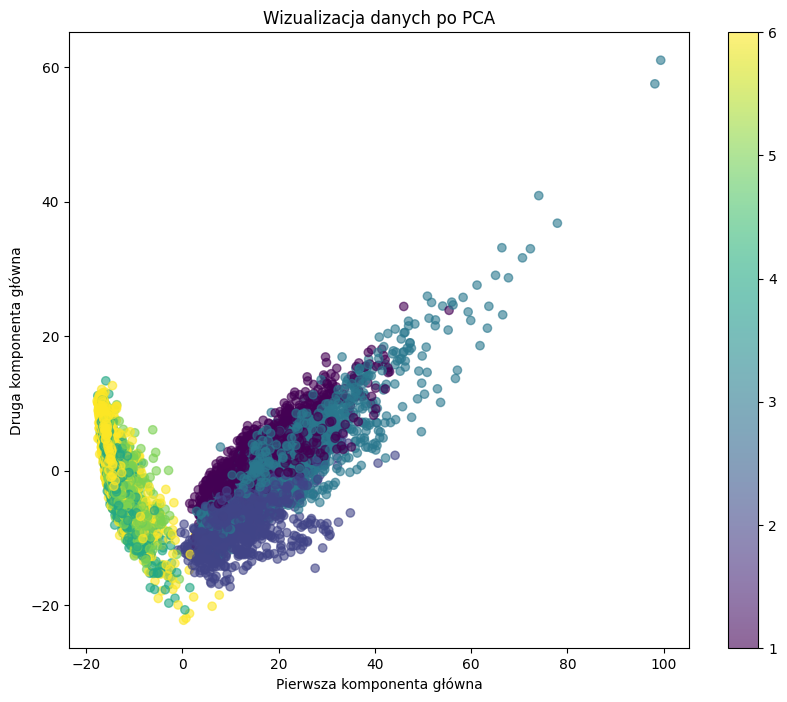

In [3]:
# Analiza rozkładu klas
print("Rozkład klas w zbiorze treningowym:")
print(labels_trai[0].value_counts())
print("\nRozkład klas w zbiorze testowym:")
print(labels_test[0].value_counts())

# Redukcja wymiarowości za pomocą PCA dla wizualizacji
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Procent wyjaśnionej wariancji
print(f"\nWyjaśniona wariancja przez pierwsze 2 komponenty: {pca.explained_variance_ratio_.sum() * 100:.2f} %")

# Wizualizacja danych po PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_combined, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Wizualizacja danych po PCA')
plt.xlabel('Pierwsza komponenta główna')
plt.ylabel('Druga komponenta główna')
plt.show()


Dla n_clusters = 2, średni współczynnik silhouette = 0.702
Dla n_clusters = 3, średni współczynnik silhouette = 0.634
Dla n_clusters = 4, średni współczynnik silhouette = 0.609
Dla n_clusters = 5, średni współczynnik silhouette = 0.495
Dla n_clusters = 6, średni współczynnik silhouette = 0.472
Dla n_clusters = 7, średni współczynnik silhouette = 0.449
Dla n_clusters = 8, średni współczynnik silhouette = 0.420
Dla n_clusters = 9, średni współczynnik silhouette = 0.404
Dla n_clusters = 10, średni współczynnik silhouette = 0.402


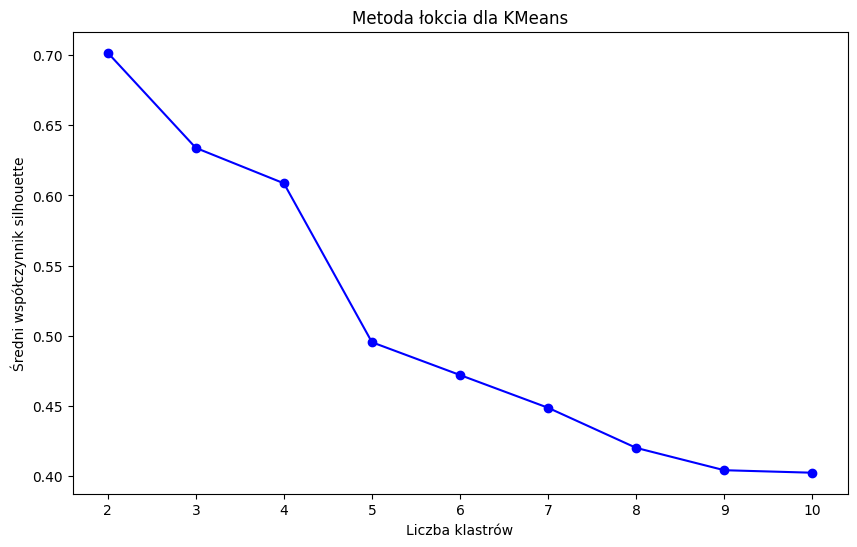


Optymalna liczba klastrów: 2


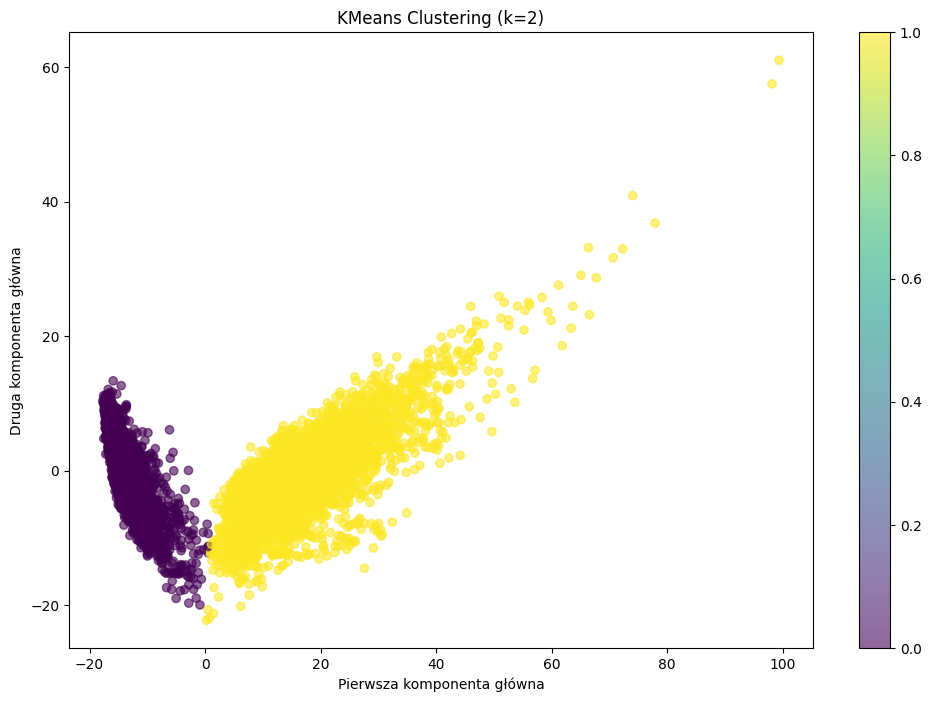

In [4]:
# KMeans clustering
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Znajdowanie optymalnej liczby klastrów dla KMeans
silhouette_scores = []
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Dla n_clusters = {n_clusters}, średni współczynnik silhouette = {silhouette_avg:.3f}")

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, 'bo-')
plt.xlabel('Liczba klastrów')
plt.ylabel('Średni współczynnik silhouette')
plt.title('Metoda łokcia dla KMeans')
plt.show()

# Wybieramy optymalną liczbę klastrów (na podstawie wykresu)
optimal_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nOptymalna liczba klastrów: {optimal_clusters}")

# Wykonujemy końcową klasteryzację
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_pca)

# Wizualizacja końcowej klasteryzacji
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title(f'KMeans Clustering (k={optimal_clusters})')
plt.xlabel('Pierwsza komponenta główna')
plt.ylabel('Druga komponenta główna')
plt.show()


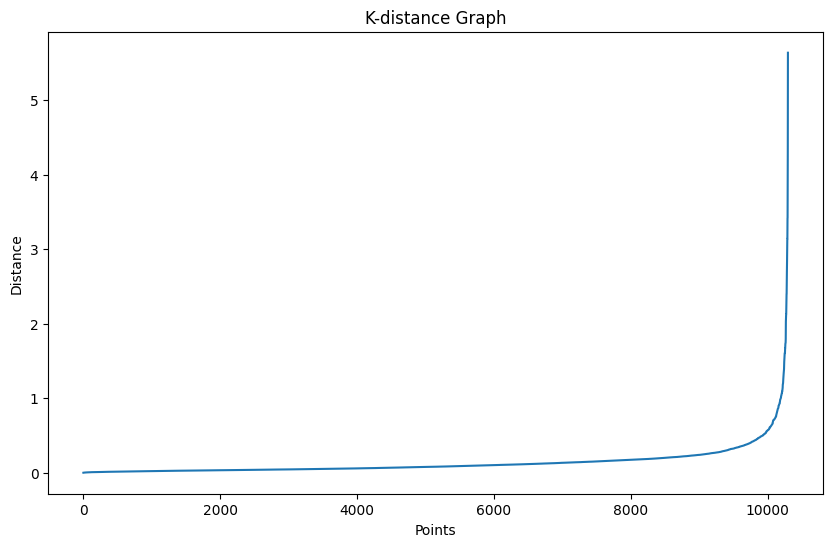

Wybrany eps: 0.023
Liczba klastrów znalezionych przez DBSCAN: 0
Liczba punktów szumu: 10299


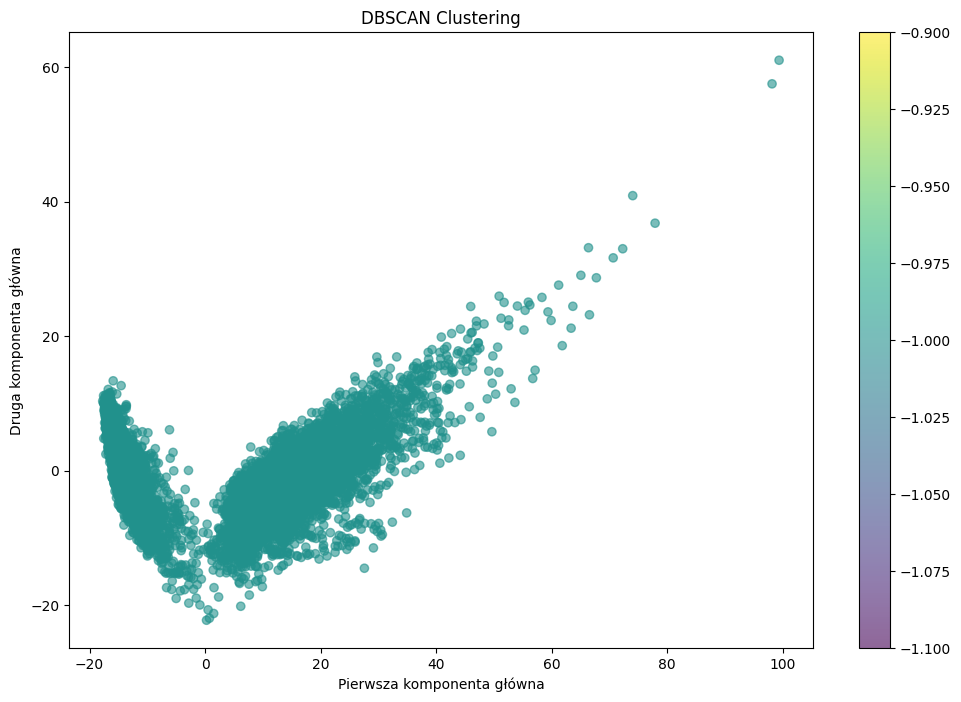

In [5]:
# DBSCAN clustering
from sklearn.neighbors import NearestNeighbors

# Znajdowanie optymalnego eps dla DBSCAN
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# Na podstawie wykresu wybieramy eps
eps = np.percentile(distances, 10)  # Wybieramy wartość na podstawie wykresu
print(f"Wybrany eps: {eps:.3f}")

# DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Liczba klastrów (ignorując szum, oznaczony jako -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Liczba klastrów znalezionych przez DBSCAN: {n_clusters}")
print(f"Liczba punktów szumu: {np.sum(dbscan_labels == -1)}")

# Wizualizacja wyników DBSCAN
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('DBSCAN Clustering')
plt.xlabel('Pierwsza komponenta główna')
plt.ylabel('Druga komponenta główna')
plt.show()


In [8]:
# Supervised Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Przygotowanie danych
X_train = train
X_test = test
y_train = labels_trai
y_test = labels_test

# Pipeline z PCA i klasyfikatorami
def create_evaluate_pipeline(classifier, name):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),  # zachowujemy 95% wariancji
        ('classifier', classifier)
    ])
    
    # Cross-validation na danych treningowych
    cv_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5)
    print(f"\n{name} - Wyniki cross-validation:")
    print(f"Średnia dokładność: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Trenowanie na całym zbiorze treningowym i ewaluacja na testowym
    pipeline.fit(X_train, y_train.values.ravel())
    test_score = pipeline.score(X_test, y_test)
    print(f"Dokładność na zbiorze testowym: {test_score:.3f}")
    
    return pipeline

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipeline = create_evaluate_pipeline(rf_clf, "Random Forest")

# SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_pipeline = create_evaluate_pipeline(svm_clf, "SVM")



Random Forest - Wyniki cross-validation:
Średnia dokładność: 0.860 (+/- 0.039)
Dokładność na zbiorze testowym: 0.881

SVM - Wyniki cross-validation:
Średnia dokładność: 0.913 (+/- 0.037)
Dokładność na zbiorze testowym: 0.938
